In [26]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [28]:
# Let us list the tech list now
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

Now let us add the data now

In [29]:
for tech in tech_list:
  globals() [tech] = pd.read_csv('/{}.csv'.format(tech))

In [30]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221039,104319500
1,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900
2,2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400
3,2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044327,157611700
4,2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282852,98390600


In [31]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-20,1831.459961,1903.709961,1825.530029,1886.900024,1886.900024,2490300
1,2021-01-21,1898.000000,1934.859985,1887.109985,1891.250000,1891.250000,2063900
2,2021-01-22,1895.680054,1910.949951,1881.760010,1901.050049,1901.050049,1272100
3,2021-01-25,1920.670044,1929.579956,1867.530029,1899.400024,1899.400024,1927300
4,2021-01-26,1888.839966,1925.000000,1884.244995,1917.239990,1917.239990,1313100


In [32]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-20,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5309800
1,2021-01-21,3293.000000,3348.550049,3289.570068,3306.989990,3306.989990,4936100
2,2021-01-22,3304.310059,3321.909912,3283.159912,3292.229980,3292.229980,2821900
3,2021-01-25,3328.500000,3363.889893,3243.149902,3294.000000,3294.000000,3749800
4,2021-01-26,3296.360107,3338.000000,3282.870117,3326.129883,3326.129883,2955200


In [33]:
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-20,217.699997,225.789993,217.289993,224.339996,222.475159,37777300
1,2021-01-21,224.699997,226.300003,222.419998,224.970001,223.099915,30709400
2,2021-01-22,227.080002,230.070007,225.800003,225.949997,224.071762,30172700
3,2021-01-25,229.119995,229.779999,224.220001,229.529999,227.621994,33152100
4,2021-01-26,231.860001,234.179993,230.080002,232.330002,230.398743,49169600


# **DATA ANALYSIS**

In [34]:
# First let us see the AAPL data for basic analysis
display(AAPL.describe())
display(AAPL.info())

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,143.036418,144.537827,141.630748,143.149799,142.809939,8.946619e+07
std,15.950985,16.227148,15.835042,16.033875,16.219467,2.905121e+07
min,119.029999,120.400002,116.209999,116.360001,115.819870,8.601775e+06
25%,129.835003,130.982498,128.612503,130.247506,129.780857,6.889110e+07
50%,143.339996,144.415001,141.680000,142.930000,142.656800,8.434445e+07
75%,149.817505,151.362499,148.687496,149.942504,149.746456,1.054095e+08
max,182.630005,182.940002,179.119995,182.009995,182.009995,1.954327e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


None

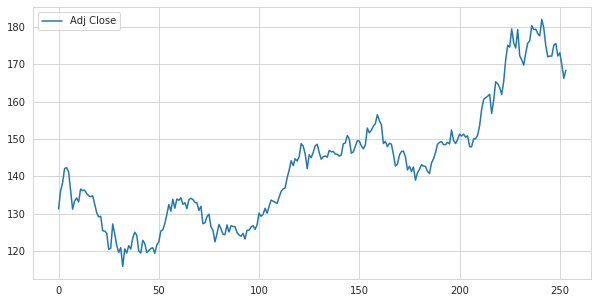

In [35]:
# Let us visualize the adjusted closing price over months
AAPL['Adj Close'].plot(legend=True, figsize=(10, 5))

Now let us see the changes in volume over the period of time.

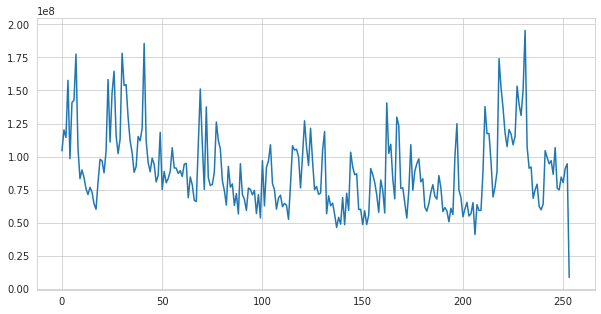

In [36]:
AAPL['Volume'].plot(figsize=(10, 5))

It can be seen that there were ups and downs in this data during this period.

### **Moving Average**

In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filte

In [37]:
period = [10, 20, 50]

for val in period:
  AAPL['Moving average for {} days'.format(val)] = (AAPL['Adj Close']).rolling(val, min_periods=1).mean()

Now let us visualize this graphically

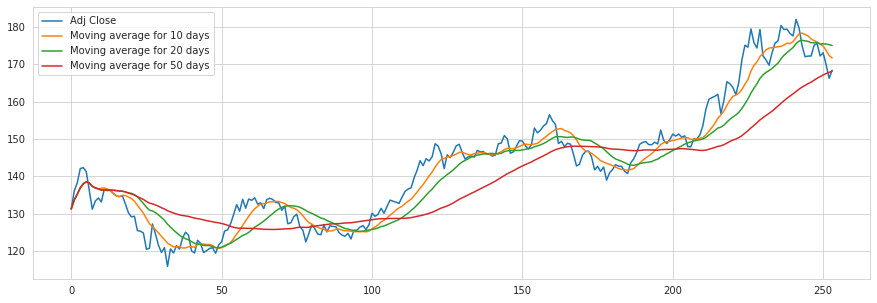

In [38]:
AAPL[['Adj Close', 'Moving average for 10 days', 'Moving average for 20 days', 'Moving average for 50 days']].plot(figsize=(15, 5))

### **Daily Returns and Risk**

Now let us visualizie the daily returns of this company

In [39]:
AAPL['daily returns'] = AAPL['Adj Close'].pct_change()
GOOG['daily returns'] = GOOG['Adj Close'].pct_change()
MSFT['daily returns'] = MSFT['Adj Close'].pct_change()
AMZN['daily returns'] = AMZN['Adj Close'].pct_change()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


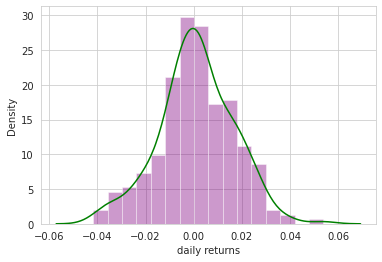

In [40]:
sns.distplot(a=AAPL['daily returns'], color='purple', kde_kws={'color': 'green'})

Now let us do this for all the companies

In [41]:
daily_returns_df = AAPL['Date']
daily_returns_df = pd.merge(daily_returns_df, AAPL[['daily returns', 'Date']], on='Date')
daily_returns_df = pd.merge(daily_returns_df, AMZN[['daily returns', 'Date']], on='Date')
daily_returns_df = pd.merge(daily_returns_df, MSFT[['daily returns', 'Date']], on='Date')
daily_returns_df = pd.merge(daily_returns_df, GOOG[['daily returns', 'Date']], on='Date')
daily_returns_df.columns = ['Date', 'AAPL', 'AMZN', 'MSFT', 'GOOG']
daily_returns_df

,Date,AAPL,AMZN,MSFT,GOOG
0,2021-01-20,NaN,NaN,NaN,NaN
1,2021-01-21,0.036658,0.013363,0.002808,0.002305
2,2021-01-22,0.016074,-0.004463,0.004356,0.005182
3,2021-01-25,0.027684,0.000538,0.015844,-0.000868
4,2021-01-26,0.001679,0.009754,0.012199,0.009392
...,...,...,...,...,...
249,2022-01-13,-0.019028,-0.024170,-0.042323,-0.017769
250,2022-01-14,0.005111,0.005732,0.017717,0.004711
251,2022-01-18,-0.018894,-0.019863,-0.024339,-0.025010
252,2022-01-19,-0.021025,-0.016477,0.002247,-0.004685


We can use seaborn pairplot  to compare all the companies together

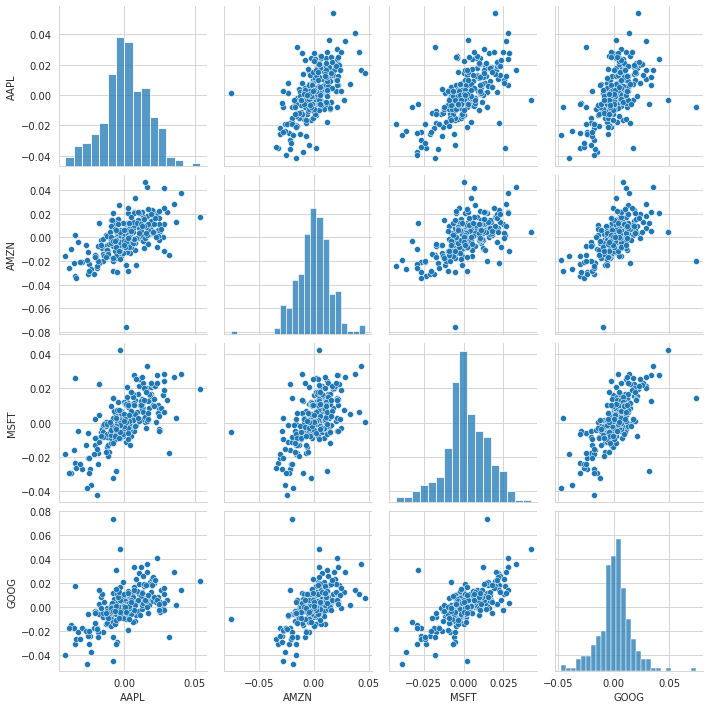

In [42]:
sns.pairplot(daily_returns_df.dropna())

But from this we are not able to find any new accurate information as all of the graphs look somewhat similar. So we will now use PairGrid

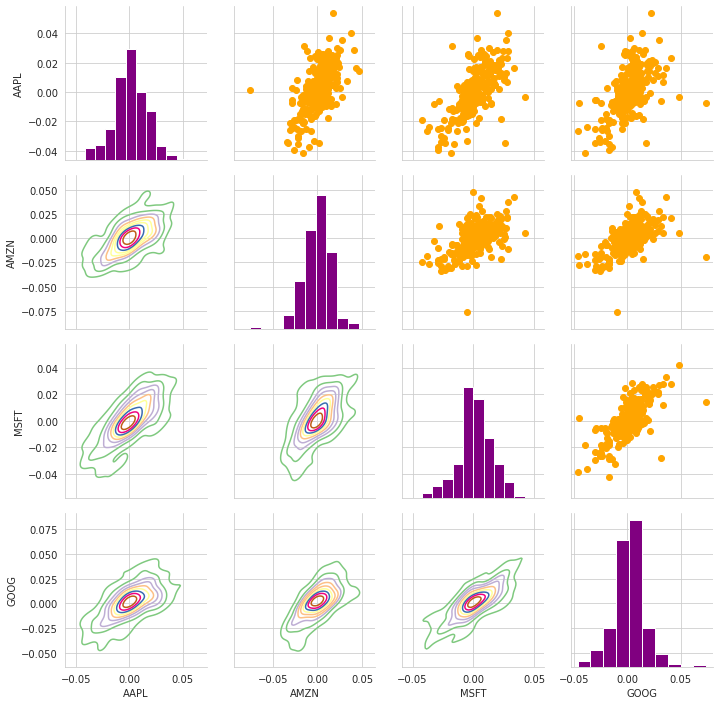

In [43]:
fig = sns.PairGrid(daily_returns_df)
fig.map_upper(plt.scatter, color='orange')
fig.map_lower(sns.kdeplot, cmap='Accent')
fig.map_diag(plt.hist, color='purple')

Now let us use correlation plot to measure this numerically

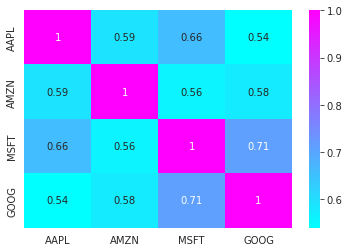

In [44]:
sns.heatmap(daily_returns_df.corr(), cmap='cool', annot=True)

## **Value at Risk**

**Using bootstrap method**

In [48]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving average for 10 days,Moving average for 20 days,Moving average for 50 days,daily returns
0,2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221039,104319500,131.221039,131.221039,131.221039,NaN
1,2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900,133.626213,133.626213,133.626213,0.036658
2,2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400,135.156779,135.156779,135.156779,0.016074
3,2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044327,157611700,136.878666,136.878666,136.878666,0.027684
4,2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282852,98390600,137.959503,137.959503,137.959503,0.001679


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


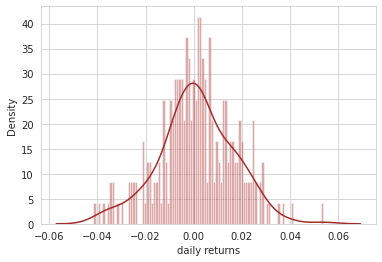

In [53]:
sns.distplot(a=AAPL['daily returns'], color='brown', bins=100)

Quantile is the method that we will be using here to find the risk value

In [58]:
daily_returns_df['AAPL'].quantile(0.05)

-0.02562245430929968

This means that with 95% confidence, the worst reduction in price would be 2.5%. That is, if the total is one million, the worst loss would be 25k.

**Value at Risk using Monte Carlo method**

In [65]:
# Terms in the equation
days = 365
dt = 1 / 365
mu = daily_returns_df['GOOG'].mean()
sigma = daily_returns_df['GOOG'].std()

In [79]:
def monte_corlo(start_price, mu, sigma, days):
  price = np.zeros(days)
  price[0] = start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  for i in range(1, days):
    shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
    drift[i] = mu * dt
    price[i] = price[i - 1] + (price[i - 1] * (drift[i] + shock[i]))

  return price

In [74]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily returns
0,2021-01-20,1831.459961,1903.709961,1825.530029,1886.900024,1886.900024,2490300,NaN
1,2021-01-21,1898.000000,1934.859985,1887.109985,1891.250000,1891.250000,2063900,0.002305
2,2021-01-22,1895.680054,1910.949951,1881.760010,1901.050049,1901.050049,1272100,0.005182
3,2021-01-25,1920.670044,1929.579956,1867.530029,1899.400024,1899.400024,1927300,-0.000868
4,2021-01-26,1888.839966,1925.000000,1884.244995,1917.239990,1917.239990,1313100,0.009392


Text(0.5, 1.0, 'Monte Carlo Method')

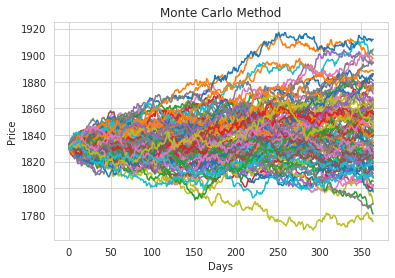

In [81]:
for i in range(100):
  plt.plot(monte_corlo(1831.45, mu, sigma, days))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Method')

Lets do the run for much more times now

In [82]:
runs = 10000
simulations = np.zeros(10000)

for run in range(runs):
  simulations[run] = monte_corlo(1831.45, mu, sigma, days)[days - 1]

1775.441962993023


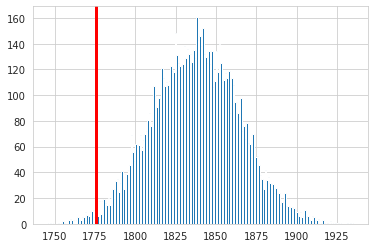

In [89]:
# lets take 1 percent quartile
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)
plt.axvline(x=q, lw=3, color='r')

In [90]:
print(q)

1775.441962993023


So this means, 99 percent of the time, the least money it is going to be is 1775